<a href="https://colab.research.google.com/github/ak5605/Language-Models/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("scores.csv")
df.head()

,Name1,Name2,Levenshtein_token,Jaro_token,Jaccard_token,Soundex_token,Metaphone_token,Hindex_token,Levenshtein,Jaro,Jaccard,Soundex,Metaphone,Hindex,Label
0,Aarav Kumar Sharma,Arav Kumar Sharma,0.930041,0.916075,1.000000,1.00,1.0000,1.00,0.971429,0.842157,1.000000,100,100,100,1
1,Aditi Patel Desai,Aditi P. Desai,1.000000,0.773704,1.000000,1.00,1.0000,1.00,0.838710,0.907886,0.833333,100,86,91,1
2,Akash Verma Reddy,Aakash Reddy,0.913223,0.896050,1.000000,1.00,1.0000,1.00,0.758621,0.811765,0.769231,75,77,74,1
3,Ananya Mishra Gupta,Ananya Misra Gupta,0.942149,0.974578,0.898148,1.00,0.8163,1.00,0.972973,0.989474,0.928571,100,89,100,1
4,Bhavya Singh Thakur,Bhagwaan Singh Thakur,0.775510,0.882973,0.713542,0.75,0.7200,0.75,0.850000,0.862367,0.800000,75,82,83,0


In [ ]:
#check of there is null values
df.isnull().sum()

Name1                0
Name2                0
Levenshtein_token    0
Jaro_token           0
Jaccard_token        0
Soundex_token        0
Metaphone_token      0
Hindex_token         0
Levenshtein          0
Jaro                 0
Jaccard              0
Soundex              0
Metaphone            0
Hindex               0
Label                0
dtype: int64

In [ ]:
df.describe()

,Levenshtein_token,Jaro_token,Jaccard_token,Soundex_token,Metaphone_token,Hindex_token,Levenshtein,Jaro,Jaccard,Soundex,Metaphone,Hindex,Label
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,0.857869,0.890260,0.852993,0.938188,0.919691,0.927174,0.752748,0.808828,0.888453,74.559471,90.757709,88.132159,0.788546
std,0.134263,0.120588,0.165765,0.118966,0.140815,0.140307,0.191548,0.153997,0.123771,23.013188,12.555163,11.551791,0.408790
min,0.148148,0.160751,0.108844,0.229167,0.202967,0.191633,0.342857,0.511655,0.437500,25.000000,43.000000,50.000000,0.000000
25%,0.795858,0.859380,0.722222,0.854167,0.820000,0.881350,0.574913,0.655956,0.818182,50.000000,83.000000,82.000000,1.000000
50%,0.895062,0.924800,0.860757,1.000000,1.000000,1.000000,0.800000,0.862319,0.909091,75.000000,100.000000,90.000000,1.000000
75%,0.990484,0.967222,1.000000,1.000000,1.000000,1.000000,0.923077,0.953580,1.000000,100.000000,100.000000,100.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,100.000000,1.000000


In [ ]:
df.Label.value_counts()

1    358
0     96
Name: Label, dtype: int64

In [ ]:
df_1 = df.select_dtypes(exclude=["object"])


In [ ]:
df_1

,Levenshtein_token,Jaro_token,Jaccard_token,Soundex_token,Metaphone_token,Hindex_token,Levenshtein,Jaro,Jaccard,Soundex,Metaphone,Hindex,Label
0,0.930041,0.916075,1.000000,1.00000,1.0000,1.00000,0.971429,0.842157,1.000000,100,100,100,1
1,1.000000,0.773704,1.000000,1.00000,1.0000,1.00000,0.838710,0.907886,0.833333,100,86,91,1
2,0.913223,0.896050,1.000000,1.00000,1.0000,1.00000,0.758621,0.811765,0.769231,75,77,74,1
3,0.942149,0.974578,0.898148,1.00000,0.8163,1.00000,0.972973,0.989474,0.928571,100,89,100,1
4,0.775510,0.882973,0.713542,0.75000,0.7200,0.75000,0.850000,0.862367,0.800000,75,82,83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.722222,0.859835,0.680000,1.00000,1.0000,1.00000,0.857143,0.934242,0.900000,100,100,100,1
450,0.867347,0.926712,0.867347,1.00000,1.0000,1.00000,0.923077,0.914530,0.909091,100,100,100,1
451,0.913223,0.896050,1.000000,0.78125,0.8200,0.89605,0.960000,0.876923,1.000000,75,91,95,1
452,0.820000,0.941800,1.000000,1.00000,1.0000,1.00000,0.909091,0.972727,1.000000,100,100,100,1


In [ ]:
x=df_1.drop("Label", axis="columns")
y=df_1.Label

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:3]

array([[ 0.53813722,  0.2143117 ,  0.8878161 ,  0.52014845,  0.57094096,
         0.51961537,  1.14290768,  0.21666649,  0.90223256,  1.10669556,
         0.73694674,  1.0284928 ],
       [ 1.0597692 , -0.96763146,  0.8878161 ,  0.52014845,  0.57094096,
         0.51961537,  0.44926717,  0.64395895, -0.44582605,  1.10669556,
        -0.37936248,  0.24853334],
       [ 0.4127376 ,  0.04806743,  0.8878161 ,  0.52014845,  0.57094096,
         0.51961537,  0.030691  ,  0.01909363, -0.96431013,  0.01916356,
        -1.09698983, -1.22472342]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25,random_state=42)


In [ ]:
x_test.shape

(114, 12)

In [ ]:
y_train.value_counts()

1    272
0     68
Name: Label, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))


0.9035087719298246


0:	learn: 0.6437079	total: 1.93ms	remaining: 191ms
1:	learn: 0.6038186	total: 7.91ms	remaining: 388ms
2:	learn: 0.5645982	total: 9.22ms	remaining: 298ms
3:	learn: 0.5286968	total: 13.6ms	remaining: 327ms
4:	learn: 0.4958450	total: 14.6ms	remaining: 278ms
5:	learn: 0.4711509	total: 15.6ms	remaining: 244ms
6:	learn: 0.4444008	total: 16.5ms	remaining: 220ms
7:	learn: 0.4231241	total: 17.5ms	remaining: 201ms
8:	learn: 0.4025393	total: 18.4ms	remaining: 186ms
9:	learn: 0.3814692	total: 19.3ms	remaining: 174ms
10:	learn: 0.3646764	total: 20.9ms	remaining: 169ms
11:	learn: 0.3490044	total: 21.9ms	remaining: 160ms
12:	learn: 0.3371237	total: 22.8ms	remaining: 153ms
13:	learn: 0.3230723	total: 24ms	remaining: 148ms
14:	learn: 0.3091200	total: 24.9ms	remaining: 141ms
15:	learn: 0.2990269	total: 26.6ms	remaining: 140ms
16:	learn: 0.2904017	total: 27.5ms	remaining: 134ms
17:	learn: 0.2816545	total: 28.4ms	remaining: 130ms
18:	learn: 0.2723714	total: 29.3ms	remaining: 125ms
19:	learn: 0.2630483	tot

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Random Forest Metrics:
Accuracy: 0.9123
Precision: 0.9222
Recall: 0.9651
F1 Score: 0.9432
Confusion Matrix:
[[21  7]
 [ 3 83]]


AdaBoost Metrics:
Accuracy: 0.8684
Precision: 0.8989
Recall: 0.9302
F1 Score: 0.9143
Confusion Matrix:
[[19  9]
 [ 6 80]]


XGBoost Metrics:
Accuracy: 0.8596
Precision: 0.8723
Recall: 0.9535
F1 Score: 0.9111
Confusion Matrix:
[[16 12]
 [ 4 82]]


CatBoost Metrics:
Accuracy: 0.9035
Precision: 0.9032
Recall: 0.9767
F1 Score: 0.9385
Confusion Matrix:
[[19  9]
 [ 2 84]]


K-Nearest Neighbors Metrics:
Accuracy: 0.9123
Precision: 0.9318
Recall: 0.9535
F1 Score: 0.9425
Confusion Matrix:
[[22  6]
 [ 4 82]]


Neural Network Metrics:
Accuracy: 0.8860
Precision: 0.9011
Recall: 0.9535
F1 Score: 0.9266
Confusion Matrix:
[[19  9]
 [ 4 82]]




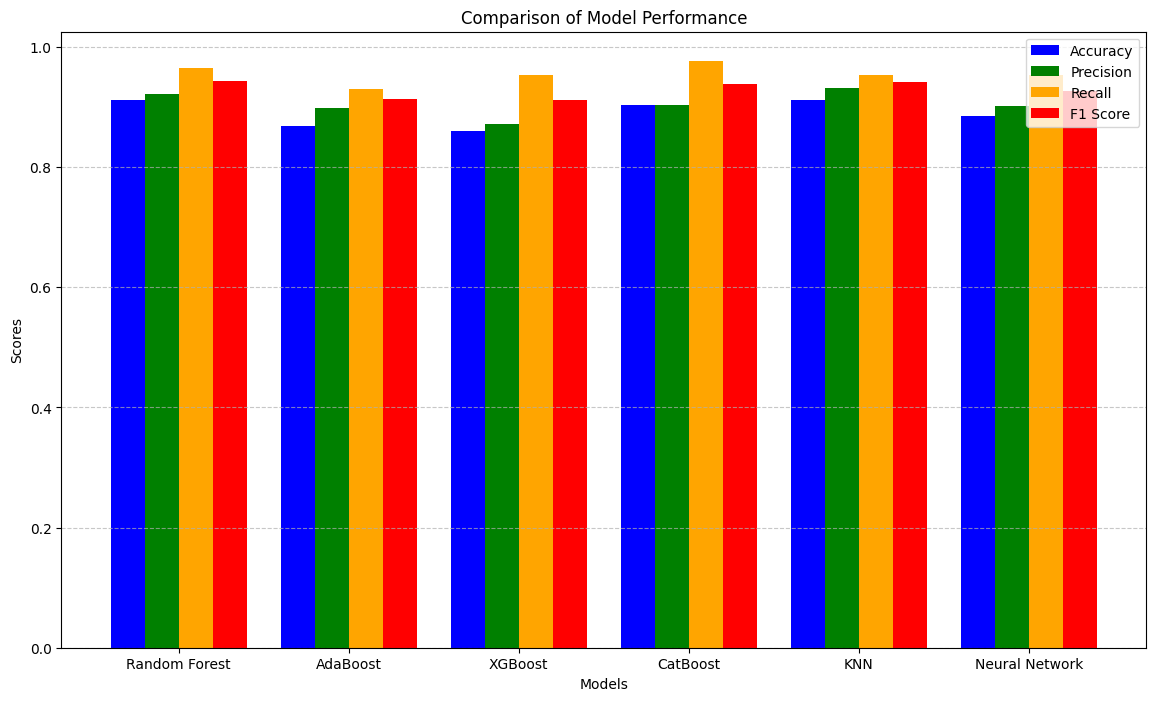

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Define hyperparameters for each model
rf_params = {'n_estimators': 100, 'max_depth': 10, 'random_state': 42}
adaboost_params = {'n_estimators': 50, 'learning_rate': 1.0, 'random_state': 42}
xgboost_params = {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'random_state': 42}
catboost_params = {'iterations': 100, 'depth': 6, 'learning_rate': 0.1, 'random_state': 42}
knn_params = {'n_neighbors': 5}
nn_params = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'max_iter': 1000, 'random_state': 42}

# Initialize classifiers with specified hyperparameters
rf_classifier = RandomForestClassifier(**rf_params)
adaboost_classifier = AdaBoostClassifier(**adaboost_params)
xgboost_classifier = XGBClassifier(**xgboost_params)
catboost_classifier = CatBoostClassifier(**catboost_params)
knn_classifier = KNeighborsClassifier(**knn_params)
nn_classifier = MLPClassifier(**nn_params)

# Train the models
rf_classifier.fit(x_train, y_train)
adaboost_classifier.fit(x_train, y_train)
xgboost_classifier.fit(x_train, y_train)
catboost_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
nn_classifier.fit(x_train, y_train)

# Make predictions
rf_pred = rf_classifier.predict(x_test)
adaboost_pred = adaboost_classifier.predict(x_test)
xgboost_pred = xgboost_classifier.predict(x_test)
catboost_pred = catboost_classifier.predict(x_test)
knn_pred = knn_classifier.predict(x_test)
nn_pred = nn_classifier.predict(x_test)

# Evaluate the models
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

    return accuracy, precision, recall, f1

# Evaluate all models
rf_metrics = evaluate_model("Random Forest", y_test, rf_pred)
adaboost_metrics = evaluate_model("AdaBoost", y_test, adaboost_pred)
xgboost_metrics = evaluate_model("XGBoost", y_test, xgboost_pred)
catboost_metrics = evaluate_model("CatBoost", y_test, catboost_pred)
knn_metrics = evaluate_model("K-Nearest Neighbors", y_test, knn_pred)
nn_metrics = evaluate_model("Neural Network", y_test, nn_pred)

# Plotting the results in one graph
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'CatBoost', 'KNN', 'Neural Network']
accuracy_scores = [rf_metrics[0], adaboost_metrics[0], xgboost_metrics[0], catboost_metrics[0], knn_metrics[0], nn_metrics[0]]
precision_scores = [rf_metrics[1], adaboost_metrics[1], xgboost_metrics[1], catboost_metrics[1], knn_metrics[1], nn_metrics[1]]
recall_scores = [rf_metrics[2], adaboost_metrics[2], xgboost_metrics[2], catboost_metrics[2], knn_metrics[2], nn_metrics[2]]
f1_scores = [rf_metrics[3], adaboost_metrics[3], xgboost_metrics[3], catboost_metrics[3], knn_metrics[3], nn_metrics[3]]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(models))

bar1 = ax.bar(index, accuracy_scores, width=bar_width, label='Accuracy', color='blue')
bar2 = ax.bar(index + bar_width, precision_scores, width=bar_width, label='Precision', color='green')
bar3 = ax.bar(index + 2*bar_width, recall_scores, width=bar_width, label='Recall', color='orange')
bar4 = ax.bar(index + 3*bar_width, f1_scores, width=bar_width, label='F1 Score', color='red')


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}

# Create MLPClassifier
mlp_model = MLPClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(best_params)

# Use the best model for predictions
mlp_predictions = best_model.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, mlp_predictions)
precision = precision_score(y_test, mlp_predictions)
recall = recall_score(y_test, mlp_predictions)
f1 = f1_score(y_test, mlp_predictions)
confusion = confusion_matrix(y_test, mlp_predictions)

# Print results
print("\nBest MLP Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}

Best MLP Classifier:
Accuracy: 0.8772
Precision: 0.8913
Recall: 0.9535
F1 Score: 0.9213
Confusion Matrix:
[[18 10]
 [ 4 82]]
